## 일표본 T검정 (One sample T-Test)
- 한 개의 모집단을 이루고 있는 양적 자료의 모평균에 대한 가설검정으로, 이전보다 모평균의 변화를 통계적으로 검정
- H0 (귀무가설) : [기준]의 평균은 [수치]이다.
- H1 (대립가설) : [기준]의 평균은 [수치]와 다르다.

### 1. 정규성 검정
- 정규분포를 따르는지 검정
- H0 (귀무가설) : 정규분포를 따름
- H1 (대립가설) : 정규분포를 따르지 않음
- 데이터 수량 < 5000 : Shapiro-wilk Test (stats.shapiro)
- 데이터 수량 >= 5000 : Anderson-darling Test (stats.anderson)

#### - 1-1. 정규성 만족 : 일표본 T검정 (stats.ttest_1samp)
#### - 1-2. 정규성 불만족 : Wilcoxon 부호순위검정 (stats.wilcoxon)

![One sample T-Test](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHUdcG%2FbtqG5Mf7jDQ%2F4bjOIBQcMGe0XpfHvb6oM1%2Fimg.jpg "1 표본 검정")

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
data = pd.read_csv('diamonds.csv', encoding='utf-8', index_col=0)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
stats.anderson(x = data.price, dist='norm')

# 통계량이 유의수준 0.05에서의 임계값 0.787보다 크므로 귀무가설을 기각 → Wilcoxon 부호순위검정 진행

AndersonResult(statistic=3474.0163510249477, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [4]:
mu = data.price.mean()
two_sided = stats.wilcoxon(data.price - mu, alternative='two-sided') # 양측검정 - 귀무가설 기각
greater = stats.wilcoxon(data.price - mu, alternative='greater') # 평균보다 많은지 검정 - 귀무가설 채택
less = stats.wilcoxon(data.price - mu, alternative='less') # 평균보다 적은지 검정 - 귀무가설 기각

print(f'{two_sided}, {greater}, {less}')

WilcoxonResult(statistic=576399622.0, pvalue=0.0), WilcoxonResult(statistic=576399622.0, pvalue=1.0), WilcoxonResult(statistic=576399622.0, pvalue=0.0)


## 독립 2표본 T검정 (Two sample T-Test)
- 두 개의 독립적인 모집단에 대한 평균에 통계적으로 유의한 차이가 있는지를 검정
- H0 (귀무가설) : [A]의 평균과 [B]의 평균은 같다. (A-B = 0)
- H1 (대립가설) : [A]의 평균과 [B]의 평균은 다르다. (A-B != 0)

### 1. 정규성 검정
- 정규분포를 따르는지 검정
- H0 (귀무가설) : 정규분포를 따름
- H1 (대립가설) : 정규분포를 따르지 않음
- 데이터 수량 < 5000 : Shapiro-wilk Test (stats.shapiro)
- 데이터 수량 >= 5000 : Anderson-darling Test (stats.anderson)

#### - 1-1. 정규성 만족 : 2번 진행
#### - 1-2. 정규성 불만족 : Wilcoxon 순위합(Ranksum)검정 (stats.ranksums)

### 2. 등분산 검정
- 분산이 고르게 분포하는지 검정
- H0 (귀무가설) : 등분산
- H1 (대립가설) : 이분산
- Levene의 검정 (stats.levene)
- Bartlett의 검정 (stats.bartlett)

#### - 2-1. 등분산성 만족 : 등분산 2표본 T검정 (stats.ttest_ind(a_group, b_group, **equal_var = True**))
#### - 2-2. 등분산성 불만족 : 이분산 2표본 T검정 (stats.ttest_ind(a_group, b_group, **equal_var = False**))

![Two sample T-Test](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbbDVHa%2FbtqG61Edtva%2FBrk63mju434VJUwZZcuQKK%2Fimg.jpg "2 표본 검정")

In [5]:
ideal, nonideal = data[data['cut'] == 'Ideal'].price, data[data['cut'] != 'Ideal'].price

In [6]:
stats.anderson(ideal)

AndersonResult(statistic=1865.0905557672377, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [7]:
stats.anderson(nonideal)

AndersonResult(statistic=1725.8414161971668, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [8]:
stats.levene(ideal, nonideal)
# P-value < 0.05 이므로 귀무가설 기각, 즉 이분산

LeveneResult(statistic=244.8982065343527, pvalue=4.446981310047094e-55)

In [9]:
stats.bartlett(ideal, nonideal)
# P-value < 0.05 이므로 귀무가설 기각, 즉 이분산

BartlettResult(statistic=117.27579363258863, pvalue=2.498005976773701e-27)

In [10]:
stats.ttest_ind(ideal, nonideal, equal_var=False)
# P-value < 0.05 이므로 귀무가설 기각, 즉 A - B != 0

Ttest_indResult(statistic=-22.985734120999393, pvalue=2.7359864985506295e-116)

In [11]:
ideal.mean(), nonideal.mean()

(3457.541970210199, 4249.026830096638)

## 대응 2표본 T검정 (Paired T-Test)
- 두 모집단에서 표본을 각각 추출할 때 각 표본의 인자가 서로 대응되는 표본으로, 사전과 사후를 비교하는 검정
- H0 (귀무가설) : [사전(Pre)]의 평균과 [사후(Post)]의 평균은 같다. (A-B = 0)
- H1 (대립가설) : [사전(Pre)]의 평균과 [사후(Post)]의 평균은 다르다. (A-B != 0)
- H1 (대립가설) : [사전(Pre)]의 평균이 [사후(Post)]의 평균보다 크다. (A-B > 0)
- H1 (대립가설) : [사전(Pre)]의 평균이 [사후(Post)]의 평균보다 작다. (A-B < 0)

### 1. 정규성 검정
- 정규분포를 따르는지 검정
- H0 (귀무가설) : 정규분포를 따름
- H1 (대립가설) : 정규분포를 따르지 않음
- 데이터 수량 < 5000 : Shapiro-wilk Test (stats.shapiro)
- 데이터 수량 >= 5000 : Anderson-darling Test (stats.anderson)

#### - 1-1. 정규성 만족 : 2번 진행
#### - 1-2. 정규성 불만족 : Wilcoxon 순위합(Ranksum)검정 (stats.ranksums)

### 2. 등분산 검정
- 분산이 고르게 분포하는지 검정
- H0 (귀무가설) : 등분산
- H1 (대립가설) : 이분산
- Levene의 검정 (stats.levene)
- Bartlett의 검정 (stats.bartlett)

#### - 2-1. 등분산성 만족 : 등분산 2표본 T검정 (stats.ttest_ind(a_group, b_group, **equal_var = True**))
#### - 2-2. 등분산성 불만족 : 이분산 2표본 T검정 (stats.ttest_ind(a_group, b_group, **equal_var = False**))


![Paired T-Test](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbymZYG%2FbtqHxbsUoZe%2FFGqhwIga4dHXXbtqWWRUSk%2Fimg.jpg "대응 2 표본 검정")

In [12]:
weights_df = pd.read_csv('weights.csv', encoding='utf-8-sig')
weights_df

# H0 귀무가설 : 다이어트는 몸무게를 줄이는 것에 효과가 없다. (사전 몸무게 = 사후 몸무게)
# H1 대립가설 : 다이어트는 몸무게를 줄이는 것에 효과가 있다. (사전 몸무게 > 사후 몸무게)

,name,before,after
0,김철수,49,46
1,김영희,53,49
2,바둑이,55,52
3,김한문,57,53
4,이수학,50,47
5,박영어,45,48
6,최과학,80,73
7,신미술,67,62
8,오체육,47,44


In [13]:
stats.shapiro(weights_df.before), stats.shapiro(weights_df.after)
# before : 정규분포를 따름
# after : 정규분포를 따르지 않음

(ShapiroResult(statistic=0.8540769219398499, pvalue=0.08261711895465851),
 ShapiroResult(statistic=0.8253390789031982, pvalue=0.03958192095160484))

In [14]:
stats.ranksums(weights_df.before, weights_df.after)

RanksumsResult(statistic=0.8830215713766959, pvalue=0.37722461666745344)

In [15]:
stats.levene(weights_df.before, weights_df.after)
# 등분산

LeveneResult(statistic=0.14597279205355218, pvalue=0.7074409497665516)

In [16]:
stats.ttest_rel(weights_df.before, weights_df.after)
# 평균이 다름

Ttest_relResult(statistic=3.603944642806961, pvalue=0.006942420396505739)

In [17]:
# 정규성 불만족 시
stats.shapiro(weights_df.before - weights_df.after)

ShapiroResult(statistic=0.810143232345581, pvalue=0.026645243167877197)

In [18]:
# alternative
# greater : 사전 집단이 사후 집단의 평균보다 많음
# less : 사전 집단이 사후 집단의 평균보다 적음
stats.wilcoxon(weights_df.before, weights_df.after, zero_method = "wilcox", alternative = "greater")

# 다이어트는 몸무게를 줄이는 것에 효과가 있음

WilcoxonResult(statistic=42.0, pvalue=0.009765625)

## 카이제곱 검정(Chi(χ2)-Square Test)
- 질적자료와 질적자료간에 서로 통계적으로 관계가 있는지 판단하는 검정
- 카이제곱 분포를 기반으로 관찰된 빈도와 기대되는 빈도와 의미있게 다른지 여부를 검증
- H0 (귀무가설) : [관찰값]과 [기대값]의 차이가 없다. (A-B = 0)
- H1 (대립가설) : [관찰값]과 [기대값]의 차이가 있다. (A-B != 0)
- 카이제곱의 분포는 자유도 ((행의 수 - 1) × (열의 수 -1))를 따름

![Chi-Square Test](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc9CFdJ%2FbtqHLeYdN4Y%2FXwtYWxSOL1Kdj60C4izp60%2Fimg.jpg "카이제곱 검정")

In [19]:
result = pd.crosstab(data.cut, data.color)
result

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [20]:
stats.chi2_contingency(observed = result)

# 310.31790052115434 : Chi-Square 값
# 1.394512091985105e-51 : p-value
# 24 : df(degree of freedom)
# array : 기대치(Expected Value)

# 유의확률이 0.000 이므로 유의수준 0.05 에서 cut 과 color 간에는 통계적으로 유의한 관련성이 있음

(310.31790052115434,
 1.394512091985105e-51,
 24,
 array([[ 202.22005933,  292.42065258,  284.80941787,  337.04338154,
          247.85761958,  161.83574342,   83.8131257 ],
        [ 616.2059696 ,  891.06566555,  867.87267334, 1027.04026696,
          755.27296997,  493.1466815 ,  255.39577308],
        [2706.85993697, 3914.25930664, 3812.37749351, 4511.56640712,
         3317.7512792 , 2166.28702262, 1121.89855395],
        [1732.18437152, 2504.82808676, 2439.63147942, 2887.05917686,
         2123.1083426 , 1386.25884316,  717.92969967],
        [1517.52966259, 2194.42628847, 2137.30893585, 2529.29076752,
         1860.00978865, 1214.47170931,  628.96284761]]))

In [21]:
result_clarity = pd.crosstab(data.cut, data.clarity)
result_clarity

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,170,261,17,69
Good,96,71,1560,1081,648,978,186,286
Ideal,146,1212,4282,2598,3589,5071,2047,2606
Premium,205,230,3575,2949,1989,3357,616,870
Very Good,84,268,3240,2100,1775,2591,789,1235


In [22]:
stats.chi2_contingency(observed = result_clarity)

# 유의확률이 0.000 이므로 유의수준 0.05 에서 cut 과 clarity 간에는 통계적으로 유의한 관련성이 있음

(4391.398067200364,
 0.0,
 28,
 array([[  22.11735261,   53.42788283,  389.96384872,  274.4223211 ,
          243.88783834,  365.87652948,  109.09436411,  151.20986281],
        [  67.39610679,  162.80571005, 1188.29977753,  836.22106044,
          743.17623285, 1114.90077864,  332.43288839,  460.76744531],
        [ 296.05656285,  715.17037449, 5219.94466073, 3673.33878383,
         3264.61292176, 4897.51868743, 1460.30598813, 2024.05202076],
        [ 189.45367075,  457.65461624, 3340.36735261, 2350.65728587,
         2089.1038376 , 3134.03926585,  934.48470523, 1295.23926585],
        [ 165.97630701,  400.94141639, 2926.4243604 , 2059.36054876,
         1830.21916945, 2745.6647386 ,  818.68205413, 1134.73140527]]))

## 분산 분석 (ANOVA : Analysis of Variance)
- k개의 집단을 비교하여 다름을 판단하는 분석 (k : 3개 이상의 유한한 개수)
- 분산 분석의 대립가설은 많은 경우의 수를 가지고 있으므로 최소한 2개의 집단은 차이가 있을 것으로 판단
- 일표본 검정 → 독립 2표본 → 분산분석 → 회귀분석으로 확장
- H0 (귀무가설) : 집단에 따른 집단 내의 차이가 없다. (A-B = 0)
- H1 (대립가설) : 집단에 따른 집단 내의 차이가 있다. (A-B != 0)

#### SST = SSE(Sum of Square Error) + SSB(Sum of Square Between)
- SST : Y의 다름의 양 (두 가지 다름의 양으로 나누어지는 값)
- SSE : 집단 내 다름의 양
- SSB : 각 집단 사이의 다름의 양
- SST(100) = SSE(90) + SSB(10) 일 경우 집단 내부적인 이유 때문에 Y의 다름이 생겼다고 해석 가능,
  결국 각 집단들이 다르다고 할 수 없고, 집단이 같다고 할 수 있음 (귀무가설 가능성 증가)
- SST(100) = SSE(10) + SSB(90) 일 경우 집단 간 양이 달라 대립가설 가능성 증가
- 분산분석은 SSE에 비해서 SSB가 얼마나 더 큰 지에 대해 초점
![SST](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FH5Yde%2FbtqHXDXIOFz%2FcliP5jiWO64nCm8tl2qu91%2Fimg.png "SST")
![SSE](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMBjPF%2FbtqH8b6MEPB%2FFT2G4drBCWUD1YsibJrYTk%2Fimg.png "SSE")
![SSB](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMORMM%2FbtqH3yVZoFm%2FH9pcmy5I3fKFh4e23DmhE1%2Fimg.png "SSB")

#### Mean Square Error
- (SSB / (k-1)) / (SSE / (n-k)) = MSB (Mean Square Between) / MSE (Mean Square Error)
- k : 집단의 개수
- n : 모든 표본의 개수
- 통계적으로 분모와 분자가 모두 제곱의 형태이면 F


![F-Statistics](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fle3f3%2FbtqIgfuX6aL%2FksEGpM7480CP1PUtJ3uJ2k%2Fimg.png "F 통계량")

In [23]:
import researchpy as rp
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

D:\CJH\venv\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [24]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
# 귀무가설 : iris 품종(setosa, versicolor, virginica)에 따라 꽃잎의 길이(petal_length)에 차이 X
# 대립가설 : iris 품종(setosa, versicolor, virginica)에 따라 꽃잎의 길이(petal_length)에 차이 O

In [26]:
rp.summary_cont(iris.petal_length)
# 변수명 / 데이터 개수 / 평균 / 표준편차 / 표준오차 / 95% 신뢰구간 / 전체구간

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,petal_length,150.0,3.758,1.7653,0.1441,3.4732,4.0428


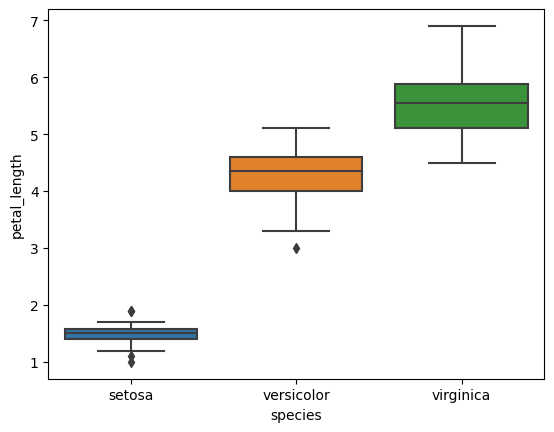

In [27]:
sns.boxplot(x = "species", y = "petal_length", data = iris)
plt.show()

In [28]:
# 등분산검정
stats.levene(iris.loc[iris.species == "setosa",     "petal_length"],
             iris.loc[iris.species == "versicolor", "petal_length"],
             iris.loc[iris.species == "virginica",  "petal_length"])

# 귀무가설을 기각하고 대립가설 채택 - 이분산

LeveneResult(statistic=19.480338801923573, pvalue=3.1287566394085344e-08)

In [29]:
# 이분산 분산 분석
pg.welch_anova(dv = "petal_length", between = "species", data = iris)

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,78.072955,1828.091945,2.693327e-66,0.941372


In [30]:
# 등분산 분산 분석
stats.f_oneway(iris.loc[iris.species == "setosa", "petal_length"],
               iris.loc[iris.species == "versicolor", "petal_length"],
               iris.loc[iris.species == "virginica", "petal_length"])

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
iris_result = ols("petal_length ~ species", data = iris).fit()
sm.stats.anova_lm(iris_result, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,437.1028,218.551400,1180.161182,2.856777e-91
Residual,147.0,27.2226,0.185188,NaN,NaN


|구분|df(자유도)|sum_sq|mean_sq|F|PR(>F)|
|:---:|:---:|:---:|:---:|:---:|:---:|
|species|K-1|SSB(Sum of Between)|MSB(Mean Square Between)|F-Statistics(MSB/MSE)|P-Value|
|Residual|K-1|SSE(Sum of Square Error)|MSE(Mean Square Error)|NA|NA|

### 크루스칼-왈리스 순위합 검정 (Kruscal-Wallis Rank Sum Test)
- k 집단 중 하나라도 정규성 가정이 깨질 때 사용
- stats.kruskal()

In [34]:
import numpy as np

outcome = [60, 65, 70, 60, 70, 70, 50, 70, 55, 80, 60]
birth = ['후', '후', '중', '초', '초', '중', '초', '중', '중', '후', '초']
kruscal_wallis_df = pd.DataFrame(np.zeros((11, 4)), columns=['birth', 'data', 'sort', 'rank'])

,birth,data,sort,rank
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [35]:
kruscal_wallis_df['birth'] = birth
kruscal_wallis_df['data'] = outcome
kruscal_wallis_df['sort'] = sorted([(i, j) for i, j in zip(outcome, birth)], key=lambda x:x[0])
kruscal_wallis_df['sort_birth'] = [i[1] for i in kruscal_wallis_df['sort'].tolist()]
kruscal_wallis_df['sort_data'] = [i[0] for i in kruscal_wallis_df['sort'].tolist()]
kruscal_wallis_df['rank'] = sorted(kruscal_wallis_df['data'].rank(method='average', ascending=True).tolist())

In [36]:
kruscal_wallis_df

,birth,data,sort,rank,sort_birth,sort_data
0,후,60,"(50, 초)",1.0,초,50
1,후,65,"(55, 중)",2.0,중,55
2,중,70,"(60, 후)",4.0,후,60
3,초,60,"(60, 초)",4.0,초,60
4,초,70,"(60, 초)",4.0,초,60
5,중,70,"(65, 후)",6.0,후,65
6,초,50,"(70, 중)",8.5,중,70
7,중,70,"(70, 초)",8.5,초,70
8,중,55,"(70, 중)",8.5,중,70
9,후,80,"(70, 중)",8.5,중,70


In [37]:
sum_df = kruscal_wallis_df.groupby(by='sort_birth').sum()
sum_df['count'] = kruscal_wallis_df.groupby(by='sort_birth')['rank'].count()
sum_df['average_ranksums'] = round(sum_df['rank'] / sum_df['count'])
sum_df

,data,rank,sort_data,count,average_ranksums
sort_birth,,,,,
중,250,27.5,265,4,7.0
초,260,17.5,240,4,4.0
후,200,21.0,205,3,7.0


![분산분석](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FANWWy%2FbtqIs9NZw4e%2FugzT2BDrEkpNKQ8OOeRYmK%2Fimg.png "분산분석")

In [112]:
# H0 귀무가설 : 태어난 달의 초반 중반 후반에 따라서 생활비 지출과 관련 X
# H1 대립가설 : 태어난 달의 초반 중반 후반에 따라서 생활비 지출과 관련 O
# 평균 순위합을 구하는 이유는 데이터가 많을 경우 순위합의 값이 크기 때문
# 귀무가설이 맞다면 예상할 수 있는 기대값 존재 (6, 6, 6)
# 평균 순위합과 기대값이 차이가 나지 않는다면 귀무가설, 차이가 많이 날수록 대립가설에 가깝다는 것.

In [38]:
stats.kruskal(iris.loc[iris.species == "setosa", "petal_length"],
              iris.loc[iris.species == "versicolor", "petal_length"],
              iris.loc[iris.species == "virginica", "petal_length"])

KruskalResult(statistic=130.41104857977163, pvalue=4.803973591157605e-29)

### 단계별 분산분석

#### 1. 정규성 검정
- H0 귀무가설 : 정규성 만족
- H1 대립가설 : 정규성 불만족

In [41]:
setosa = iris.loc[iris.species == "setosa", "petal_length"]
versicolor = iris.loc[iris.species == "versicolor", "petal_length"]
virginica = iris.loc[iris.species == "virginica", "petal_length"]

setosa_normality, versicolor_normality, virginica_normality = stats.shapiro(setosa), stats.shapiro(versicolor), stats.shapiro(virginica)

print("Setosa : ", setosa_normality)
print("Versicolor : ", versicolor_normality)
print("Virginica : ", virginica_normality)

# 모든 변수의 p-Value가 0.05 이상이므로 귀무가설을 만족 → 정규성 만족

Setosa :  ShapiroResult(statistic=0.9549766182899475, pvalue=0.05481043830513954)
Versicolor :  ShapiroResult(statistic=0.9660047888755798, pvalue=0.1584833413362503)
Virginica :  ShapiroResult(statistic=0.9621862769126892, pvalue=0.10977369546890259)


#### 2. 등분산 검정
- H0 귀무가설 : 등분산
- H1 대립가설 : 이분산

In [42]:
stats.levene(setosa, versicolor, virginica)

# p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) → 이분산 (등분산 불만족)

LeveneResult(statistic=19.480338801923573, pvalue=3.1287566394085344e-08)

#### 3. 분산분석 - 이분산
- H0 귀무가설 : 분산 차이 X
- H1 대립가설 : 분산 차이 O

In [43]:
pg.welch_anova(dv = 'petal_length', between = 'species', data = iris)

# p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) → 품종에 따른 꽃잎의 길이는 통계적으로 유의한 차이 존재

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,78.072955,1828.091945,2.693327e-66,0.941372


### 모수적 방법(Parametric Method)
#### 모집단의 분포를 가정할 수 있을 때 사용하는 방법
- **One Sample T-Test**
- **Two Sample T-Test**
- **Paired T-Test**
- **ANOVA**


### 비모수적 방법(Non-Parametric Method)
#### 모집단의 분포를 가정할 수 없거나 아주 약하게 가정할 때 사용하는 방법
- **Wilcoxon's Signed Rank Test**
- **Wilcoxon's Rank Sum Test**
- **Kruskal-Wallis Rank Sum Test**

![통계분석](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FeazPFC%2FbtqIwYkRsb4%2FCiInVwED7Y8rBKwRMR96tk%2Fimg.jpg "통계분석")

## 상관분석(Correlation Analysis)
- 선형(직선)의 관계가 있는지를 분석
- **산점도**와 **상관계수**

### 산점도 (Scatter Plot)
![산점도](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99B6283D5F65B46C08 "산점도")
- sns.pairplot()

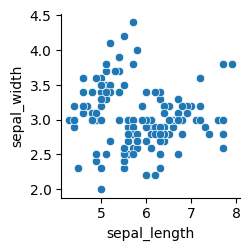

In [45]:
sns.pairplot(iris, x_vars = "sepal_length", y_vars = "sepal_width");

### Spearman 상관계수
- X, Y가 정규성을 만족하지 않거나, 순위형 자료일 때 사용
![Spearman](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99C9C23E5F65B95A0C "Spearman")
- 5개의 양적 자료 X와 양적 자료 Y의 순위를 정해 Spearman 상관계수를 계산
- 0.9 : 키가 클 수록 몸무게도 크다는 의미
- stats.spearmanr(a = X, b = Y)


### Kendall
- 두 양적 자료가 정규성을 만족하지 않을 때 두 자료 간의 상관관계를 확인하는 방법
![Kendall](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F998273485F65BF1C0E "Kendall")
- X를 기준으로 오름차순 정렬을 한 뒤 첫 번째 자료에 기준을 두고 이후 X와 Y가 증가하는지를 확인하여, 모두 증가하면 Concordant Pair (C#), 하나라도 증가하지 않을 경우 Disconcordant Pair (D#)으로 계산하는 방법
- stats.kendalltau(x, y)


### Pearson 상관계수
- 데이터가 정규성을 만족할 경우에 사용
- H0 귀무가설 : X와 Y간 직선의 관계 X
- H1 대립가설 : X와 Y간 직선의 관계 O
![Pearson](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F991A4B4B5F65C3F310 "Pearson")
- stats.pearsonr(x, y)

In [47]:
# Pearson 상관분석
stats.pearsonr(x = iris.petal_length, y = iris.sepal_length)
# 상관계수 r, p-Value
# p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) → 꽃잎의 길이가 증가하면 꽃받침의 길이도 증가하는 경향을 보임

(0.8717537758865833, 1.0386674194496954e-47)

In [48]:
# Spearman 상관분석
stats.spearmanr(a = iris.petal_length, b = iris.sepal_length)
# 상관계수 r, p-Value
# p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) → 꽃잎의 길이가 증가하면 꽃받침의 길이도 증가하는 경향을 보임

SpearmanrResult(correlation=0.8818981264349859, pvalue=3.443087278047102e-50)

In [49]:
# kendall 상관분석
stats.kendalltau(x = iris.petal_length, y = iris.sepal_length)
# 상관계수 tau, p-Value
# p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) → 꽃잎의 길이가 증가하면 꽃받침의 길이도 증가하는 경향을 보임

KendalltauResult(correlation=0.7185159275387325, pvalue=1.1691259442824597e-36)

### 단계별 상관분석
![상관분석](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F995D484B5F6B423434 "상관분석")
#### 1. 정규성 검정
- H0 귀무가설 : 정규분포 만족
- H1 대립가설 : 정규분포 불만족

In [50]:
pl_normality = stats.shapiro(iris.petal_length)
sl_normality = stats.shapiro(iris.sepal_length)

print("Petal Length : ", pl_normality)
print("Sepal Length : ", sl_normality)

# 두 데이터 모두 p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) → 정규분포 불만족 → Spearman / Kendall 상관분석 진행

Petal Length :  ShapiroResult(statistic=0.8762688040733337, pvalue=7.412849778454245e-10)
Sepal Length :  ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)


#### 2. 상관분석 (정규성 불만족)

In [51]:
# Kendall 상관분석
stats.kendalltau(iris.petal_length, iris.sepal_length)
# p-Value가 0.05 이하이므로 귀무가설을 기각 (대립가설 채택) →
# 꽃잎의 길이와 꽃받침의 길이 간에는 통계적으로 강한 양의 상관관계가 존재

KendalltauResult(correlation=0.7185159275387325, pvalue=1.1691259442824597e-36)